# Analyzing Suicide and Homicide rates in all countries
In this project we will analyzie the suicide and homcide dataset from kaggle and extract some interesting facts from it. (link for the dataset : https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp)

## Downloading the Dataset

We will download the required dataset from kaggle and upload it to the root folder of the notebook. Alernatively we can use the opendatasets library of python to bypass the download and uploading processing but for that you need to have an account on kaggle. 

The dataset has been downloaded extracted and uiploaded. Now let's begin by listing the files within the dataset.

In [2]:
data_dir = './'

In [3]:
import os
os.listdir(data_dir)

['.config', 'suicide homicide gdp.csv', 'sample_data']

Let us save and upload our work to Jovian before continuing.

In [4]:
project_name = "Analysis of Homicide and Sucide rates of countries" 

In [5]:
!pip install jovian --upgrade -q

In [6]:
import jovian

In [7]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries


'https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries'

Before we start any processing of our data we will import all the libraries that we will be needing for the project.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Data Preparation and Cleaning

We will now load our dataset into a dataframe using the pandas library and prepare our data for further processing.



In [9]:
dataframe = pd.read_csv("suicide homicide gdp.csv")
dataframe


,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


We can see that a lot of the data has NaN values in two columns specifically. This can disrupt our analysis. Se we will now clean up our data and remove nan values using dropna function.

In [10]:
data_cleaned = dataframe.dropna(subset=["Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)","GDP per capita, PPP (current international $)","GDP (current US$)"])
data_cleaned.reset_index(drop=True)


,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,2009,3.926774,4.4,1.241616e+10,1519.692923,South Asia,Low income
1,Afghanistan,AFG,AF,2010,3.368110,4.3,1.585668e+10,1710.575411,South Asia,Low income
2,Afghanistan,AFG,AF,2011,4.087337,4.1,1.780511e+10,1699.488110,South Asia,Low income
3,Afghanistan,AFG,AF,2012,6.251328,4.0,1.990732e+10,1914.774228,South Asia,Low income
4,Afghanistan,AFG,AF,2015,9.783922,4.0,1.913421e+10,2087.305323,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
2468,Zimbabwe,ZWE,ZW,2004,11.281282,14.2,5.805598e+09,1762.520649,Sub-Saharan Africa (excluding high income),Lower middle income
2469,Zimbabwe,ZWE,ZW,2005,11.178553,14.0,5.755215e+09,1705.569979,Sub-Saharan Africa (excluding high income),Lower middle income
2470,Zimbabwe,ZWE,ZW,2006,8.819056,14.4,5.443896e+09,1685.362389,Sub-Saharan Africa (excluding high income),Lower middle income
2471,Zimbabwe,ZWE,ZW,2010,5.599427,21.5,1.204166e+10,1830.827333,Sub-Saharan Africa (excluding high income),Lower middle income


Let us remove the data corresponding to World as it is the sum of values of all countries and can hinder our analysis.

In [11]:
index1 = np.array(data_cleaned[(data_cleaned.country == 'World')].index)
index2 = np.array(data_cleaned[(data_cleaned.incomeLevel == 'nan')].index)
index3 = np.array(data_cleaned[(data_cleaned.incomeLevel == 'Not classified')].index)
index = np.append(np.append(index1, index2), index3)

In [12]:
data_cleaned = data_cleaned.drop(index)

In [13]:
print(dataframe.shape)
print(data_cleaned.shape)

(13566, 10)
(2458, 10)


We can see that from 13566 rows only 2458 are usable. From here on we will work with these 2508 rows

Let's take a look at the segregation of income levels.

In [14]:
data_cleaned['incomeLevel'].unique()

array(['Low income', 'Aggregates', 'Upper middle income',
       'Lower middle income', 'High income', nan], dtype=object)

In [15]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries


'https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries'

## Exploratory Analysis and Visualization


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

let's now take a look at mean sucide mortality rate per 100,00 population of countries over the years 2009 to 2012

In [17]:
mean_suicide_mortality = pd.DataFrame(data_cleaned.groupby(['country', 'iso3c'])['Suicide mortality rate (per 100,000 population)','GDP per capita, PPP (current international $)'].mean().reset_index())
mean_suicide_mortality

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,iso3c,"Suicide mortality rate (per 100,000 population)","GDP per capita, PPP (current international $)"
0,Afghanistan,AFG,4.125000,1881.748742
1,Africa Eastern and Southern,AFE,8.635075,3424.933620
2,Africa Western and Central,AFW,6.022582,4040.126315
3,Albania,ALB,5.957895,8536.359749
4,Algeria,DZA,3.315385,12264.859929
...,...,...,...,...
199,Uzbekistan,UZB,9.115385,4497.041320
200,Vietnam,VNM,6.545455,3248.953299
201,"Yemen, Rep.",YEM,5.841667,3597.690932
202,Zambia,ZMB,9.933333,3088.156585


Text(0, 0.5, 'Suicide mortality rate')

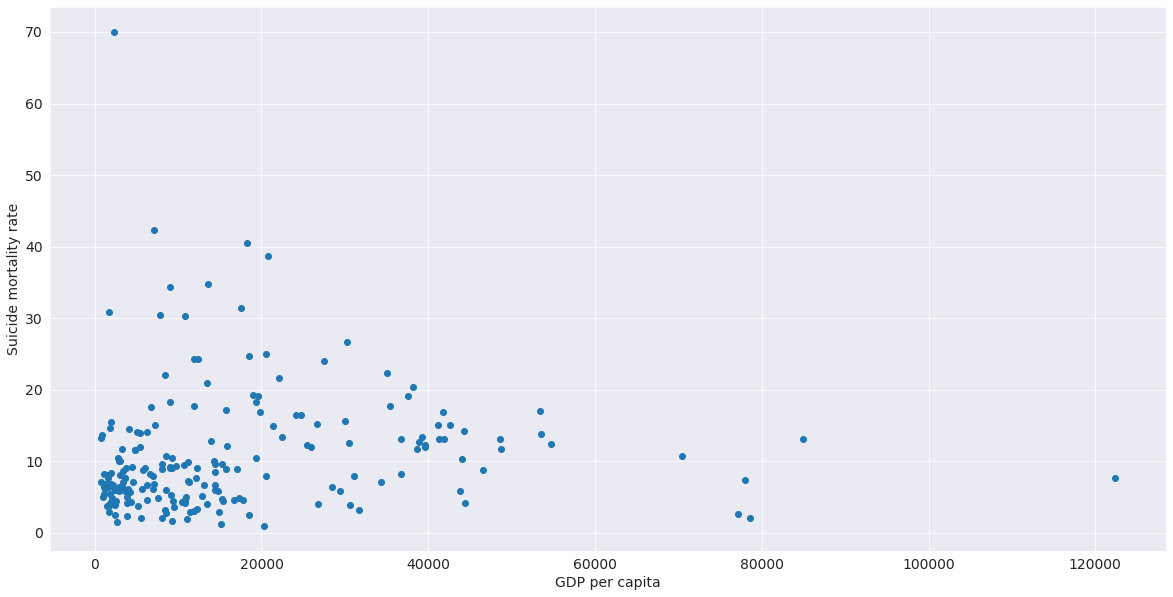

In [18]:
plt.scatter(mean_suicide_mortality["GDP per capita, PPP (current international $)"], mean_suicide_mortality['Suicide mortality rate (per 100,000 population)'])
plt.xlabel("GDP per capita")
plt.ylabel("Suicide mortality rate")

It seems countries with higher GDP have lower sucidide mortality rates.

Let's take a look at top 10 countries with highest suicide mortality rates.

In [19]:
top_10_suicide = mean_suicide_mortality.sort_values(by=['Suicide mortality rate (per 100,000 population)'],ascending=False)[:10]
top_10_suicide.reset_index()

,index,country,iso3c,"Suicide mortality rate (per 100,000 population)","GDP per capita, PPP (current international $)"
0,106,Lesotho,LSO,70.012500,2294.755285
1,54,Eswatini,SWZ,42.338889,7121.947736
2,155,Russian Federation,RUS,40.489474,18264.779220
3,108,Lithuania,LTU,38.605263,20782.970115
4,17,Belarus,BLR,34.715789,13537.709110
5,72,Guyana,GUY,34.273684,9010.426145
6,94,Kazakhstan,KAZ,31.457143,17541.153634
7,96,Kiribati,KIR,30.885714,1708.023177
8,193,Ukraine,UKR,30.428571,7816.492753
9,24,Botswana,BWA,30.340000,10851.015852


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

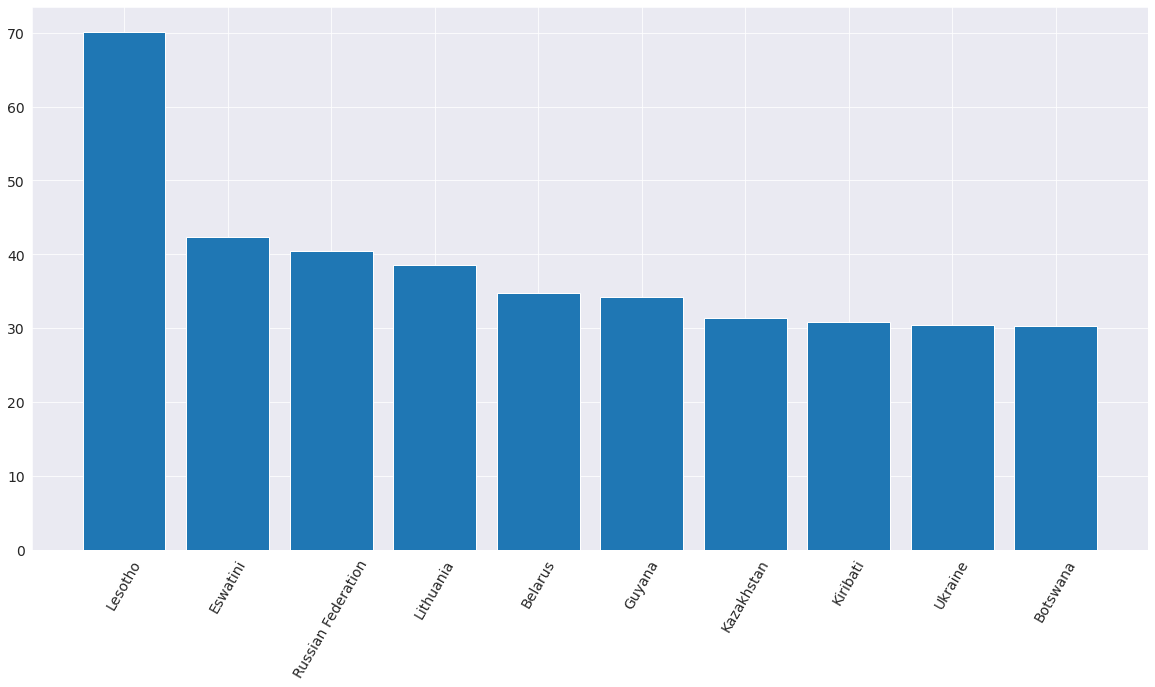

In [20]:
plt.bar(top_10_suicide['country'],top_10_suicide["Suicide mortality rate (per 100,000 population)"])
plt.xticks(rotation=60)

let's now take a look at mean intentional homicide rate per 100,00 population of countries over the years 2009 to 2012

In [21]:
mean_homicide_mortality = pd.DataFrame(data_cleaned.groupby(['country'])['Intentional homicides (per 100,000 people)','GDP per capita, PPP (current international $)'].mean().reset_index())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [22]:
mean_homicide_mortality

,country,"Intentional homicides (per 100,000 people)","GDP per capita, PPP (current international $)"
0,Afghanistan,5.912825,1881.748742
1,Africa Eastern and Southern,11.966667,3424.933620
2,Africa Western and Central,9.833333,4040.126315
3,Albania,4.067445,8536.359749
4,Algeria,1.109717,12264.859929
...,...,...,...
201,Uzbekistan,2.963718,4497.041320
202,Vietnam,1.337206,3248.953299
203,"Yemen, Rep.",4.693661,3597.690932
204,Zambia,5.998878,3088.156585


Text(0, 0.5, ' mortality rate')

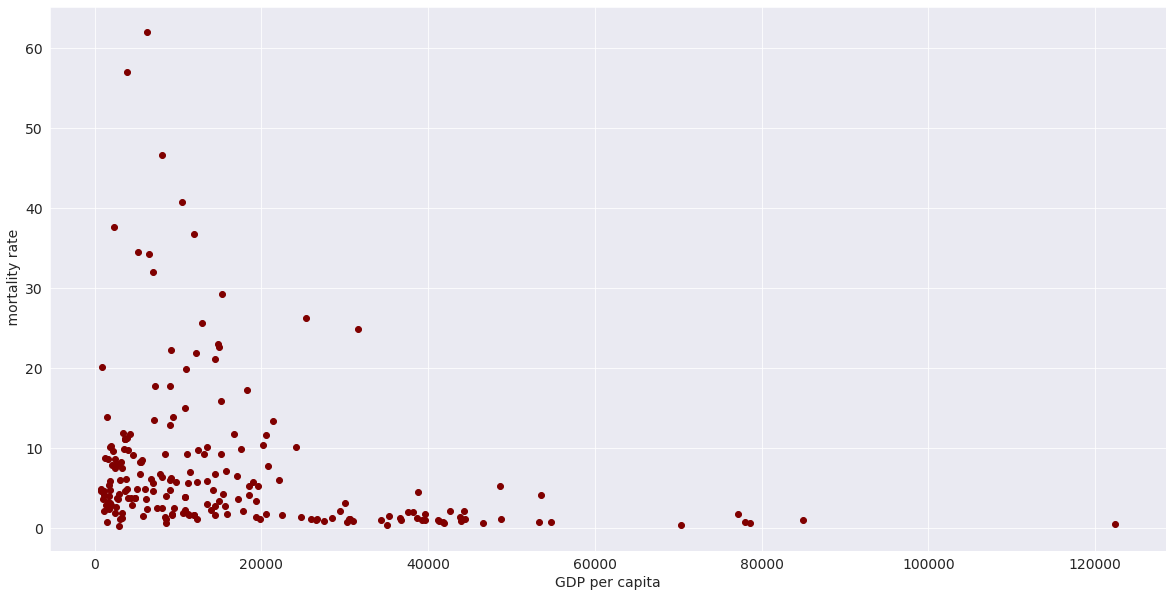

In [23]:
plt.scatter(mean_homicide_mortality["GDP per capita, PPP (current international $)"], mean_homicide_mortality['Intentional homicides (per 100,000 people)'], color='maroon')
plt.xlabel("GDP per capita")
plt.ylabel(" mortality rate")

It seems countries with higher GDP have lower homicide mortality rates.

Let's take a look at top 10 countries with highest  intentional homicide mortality rates.

In [24]:
top_10_homicide = mean_homicide_mortality.sort_values(by=['Intentional homicides (per 100,000 people)'],ascending=False)[:10]
top_10_homicide.reset_index()

,index,country,"Intentional homicides (per 100,000 people)","GDP per capita, PPP (current international $)"
0,52,El Salvador,62.048729,6233.080958
1,76,Honduras,56.976382,3857.460931
2,91,Jamaica,46.629342,8042.413785
3,39,Colombia,40.743651,10523.218579
4,107,Lesotho,37.606002,2294.755285
5,170,South Africa,36.761111,11899.939629
6,136,Nigeria,34.524046,5234.679127
7,70,Guatemala,34.255667,6587.522994
8,19,Belize,32.074210,6985.258576
9,34,Caribbean small states,29.300000,15268.465085


<BarContainer object of 10 artists>

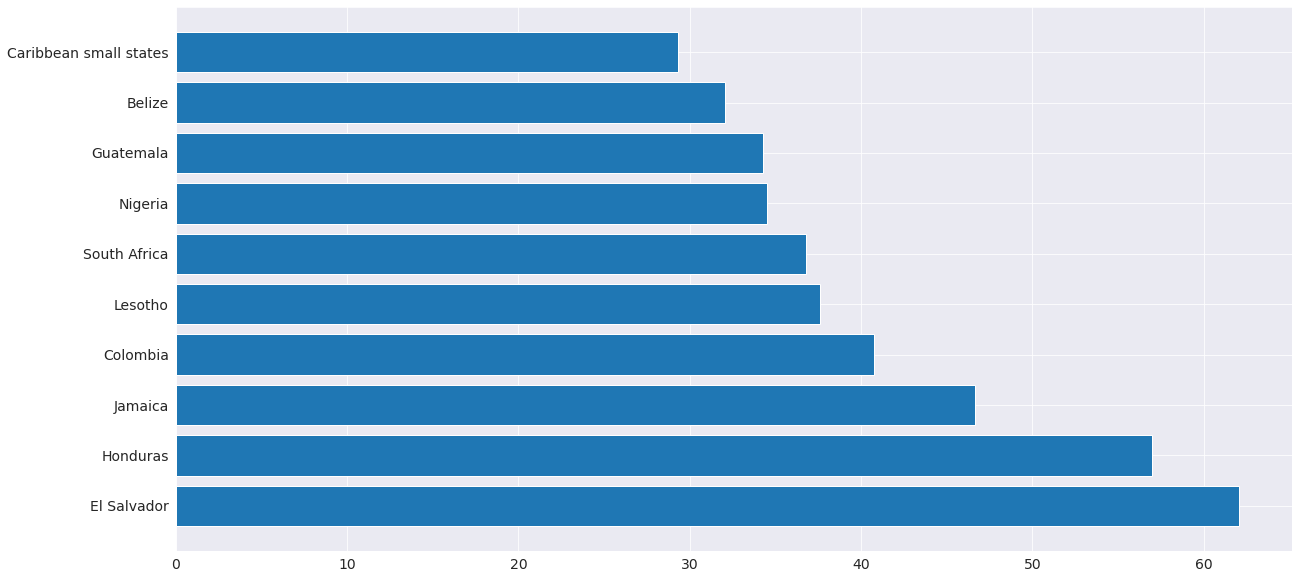

In [25]:
plt.barh(top_10_homicide['country'],top_10_homicide["Intentional homicides (per 100,000 people)"])

Now let us visualize the gap in GDP of top 5 and bottom 5 countries.

In [26]:
mean_GDP = pd.DataFrame(data_cleaned.groupby(['country', 'iso3c'])['GDP per capita, PPP (current international $)','GDP (current US$)'].mean().reset_index())
mean_GDP = mean_GDP.sort_values(by = ['GDP per capita, PPP (current international $)'], ascending=False).reset_index()
mean_GDP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,index,country,iso3c,"GDP per capita, PPP (current international $)",GDP (current US$)
0,153,Qatar,QAT,122389.946417,1.038391e+11
1,112,Luxembourg,LUX,84957.517419,4.860125e+10
2,26,Brunei Darussalam,BRN,78632.317948,1.234838e+10
3,194,United Arab Emirates,ARE,78015.315491,2.986649e+11
4,98,Kuwait,KWT,77125.087876,9.785367e+10
...,...,...,...,...,...
199,134,Niger,NER,1113.456937,9.099932e+09
200,107,Liberia,LBR,1033.097044,2.009102e+09
201,35,Central African Republic,CAF,851.072671,1.825018e+09
202,127,Mozambique,MOZ,766.251894,9.376069e+09


In [27]:

X = np.array(mean_GDP['GDP per capita, PPP (current international $)'][:5] )
Y = np.array(mean_GDP['GDP per capita, PPP (current international $)'][-5:])
print(np.append(X,Y))

[122389.94641713  84957.51741894  78632.31794835  78015.31549111
  77125.08787634   1113.45693668   1033.09704432    851.07267131
    766.25189376    719.1961914 ]


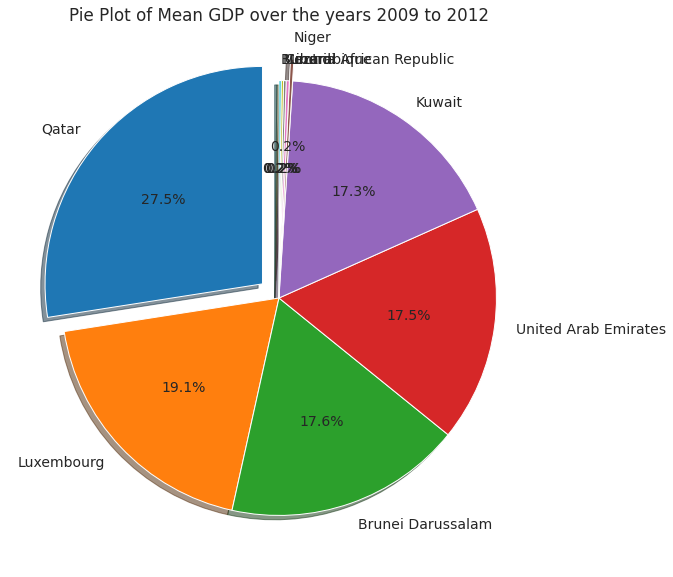

In [28]:
slices = np.append(np.array(mean_GDP['GDP per capita, PPP (current international $)'][:5] ), np.array(mean_GDP['GDP per capita, PPP (current international $)'][-5:]))
activities = np.append(np.array(mean_GDP['country'][:5] ), np.array(mean_GDP['country'][-5:]))
plt.pie(slices, labels=activities, startangle=90, shadow= True, explode=(0.1,0,0,0,0,0.1,0,0,0,0), autopct= '%1.1f%%')
plt.title('Pie Plot of Mean GDP over the years 2009 to 2012')
plt.show()


It seems that the ratio of GDP of top 5 countries with highest GDP to bottom 5 is very high. 

Let us save and upload our work to Jovian before continuing

In [29]:
import jovian

In [30]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries


'https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries'

## Asking and Answering Questions

We shall start answering some intersting question about our dataset.



#### Q1: Which country has the highest GDP per capita ?



In [31]:
top10_mean_GDP_percapita = np.array(mean_GDP['GDP per capita, PPP (current international $)'][0:10])
top10_GDP_countries_percapita = np.array(mean_GDP['country'][0:10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'GDP in US$')

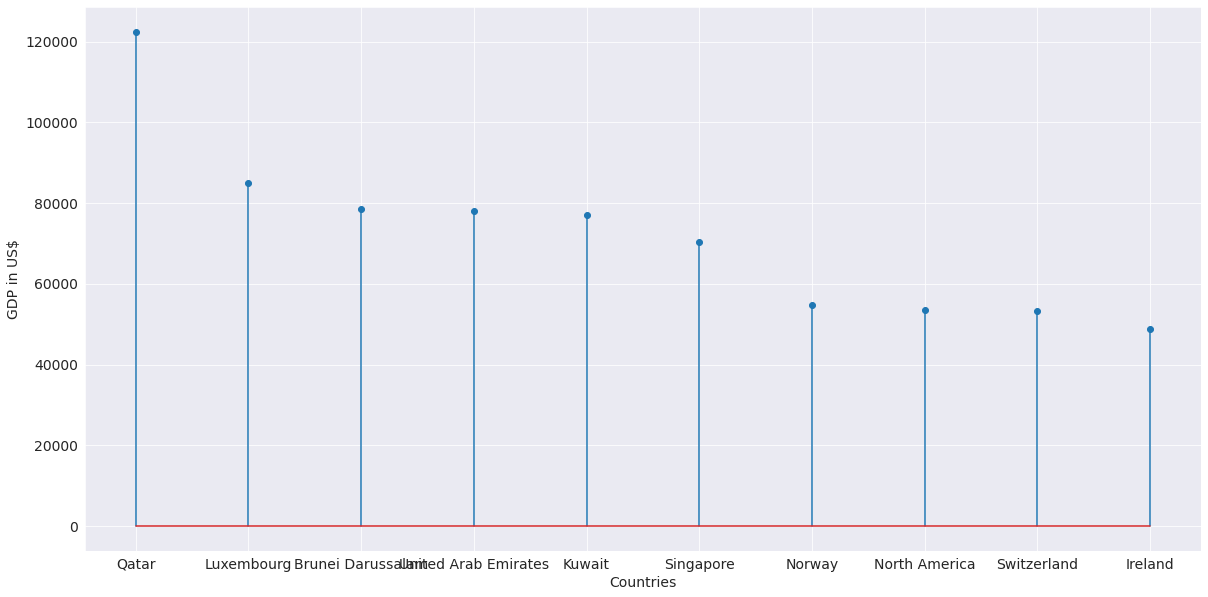

In [32]:
plt.stem(top10_GDP_countries_percapita, top10_mean_GDP_percapita)
plt.xlabel("Countries")
plt.ylabel("GDP in US$")

#### Q2: Which country has the lowest GDP per capita ?

In [33]:
bottom10_mean_GDP_percapita = np.array(mean_GDP['GDP per capita, PPP (current international $)'][-10:])
bottom10_GDP_percapita_countries = np.array(mean_GDP['country'][-10:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'GDP in US$')

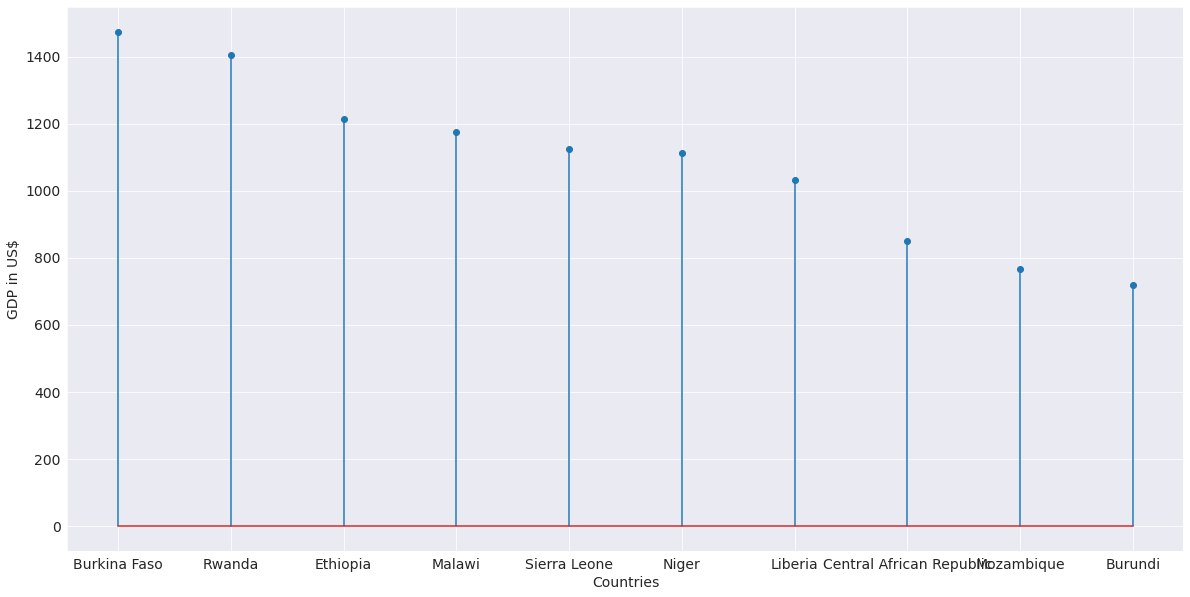

In [36]:
plt.stem(bottom10_GDP_percapita_countries, bottom10_mean_GDP_percapita)
plt.xlabel("Countries")
plt.ylabel("GDP in US$")


#### Q3:What is the trend of the suicide and homicide rates over time?



In [37]:
mean_SH_rates = pd.DataFrame(data_cleaned.groupby(['year'])['Intentional homicides (per 100,000 people)', 'Suicide mortality rate (per 100,000 population)'].mean().reset_index())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [38]:
mean_S_over_years = mean_SH_rates.sort_values(by = ['Suicide mortality rate (per 100,000 population)'], ascending=False).reset_index()
mean_H_over_years = mean_SH_rates.sort_values(by = ['Intentional homicides (per 100,000 people)'], ascending=False).reset_index()

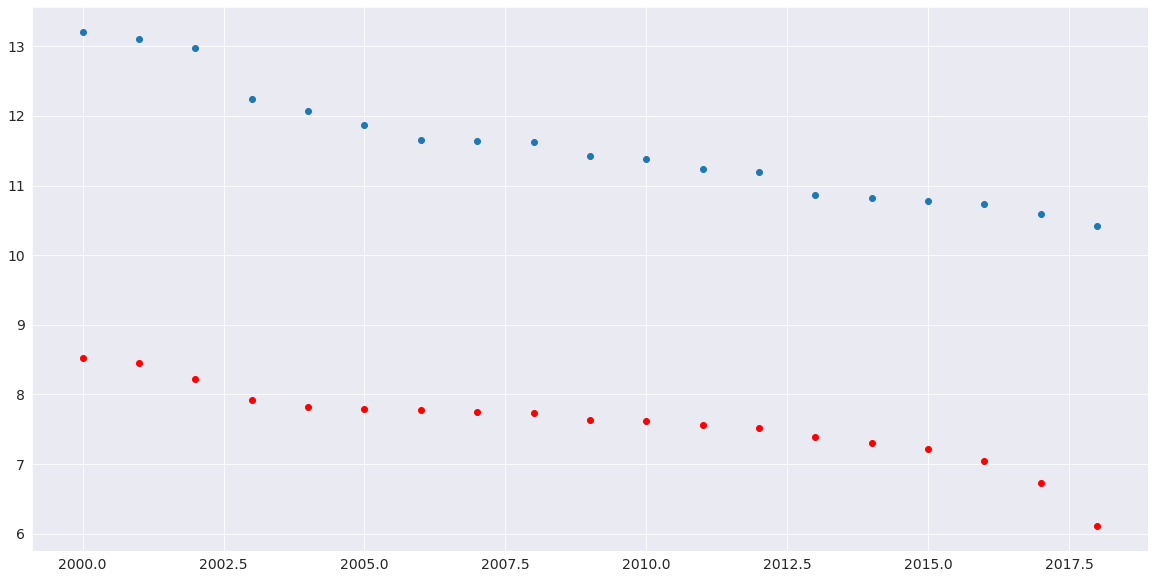

In [43]:
plt.scatter(mean_SH_rates['year'],mean_S_over_years['Suicide mortality rate (per 100,000 population)'] )
plt.scatter(mean_SH_rates['year'],mean_H_over_years['Intentional homicides (per 100,000 people)'], color='red' )

We can observe that the mean suicide and homicide rates have constatly decreased over time.

#### Q4: In which year suicide and homicide rates were lowest and highest?

In [61]:
print('Homicide mortality rates were highest in {}'.format(mean_H_over_years['year'][0]))
print('Suicide mortality rates were highest in {}'.format(mean_S_over_years['year'][0]))
print('Homicide mortality rates were lowest in {}'.format(mean_H_over_years['year'][18]))
print('Suicide mortality rates were lowest in {}'.format(mean_S_over_years['year'][18]))

Homicide mortality rates were highest in 2002
Suicide mortality rates were highest in 2000
Homicide mortality rates were lowest in 2018
Suicide mortality rates were lowest in 2016


#### Q5: Which regions have the highest and lowest GDP per capita?

In [63]:
mean_GDP_regions = pd.DataFrame(data_cleaned.groupby(['adminregion'])['GDP per capita, PPP (current international $)'].mean().reset_index())
mean_GDP_regions =mean_GDP_regions.sort_values(by = ['GDP per capita, PPP (current international $)'], ascending=False).reset_index()


In [64]:
mean_GDP_regions

,index,adminregion,"GDP per capita, PPP (current international $)"
0,1,Europe & Central Asia (excluding high income),10614.294739
1,2,Latin America & Caribbean (excluding high income),9892.962075
2,3,Middle East & North Africa (excluding high inc...,9387.553223
3,0,East Asia & Pacific (excluding high income),6680.633232
4,4,South Asia,4937.723020
5,5,Sub-Saharan Africa (excluding high income),4546.445988


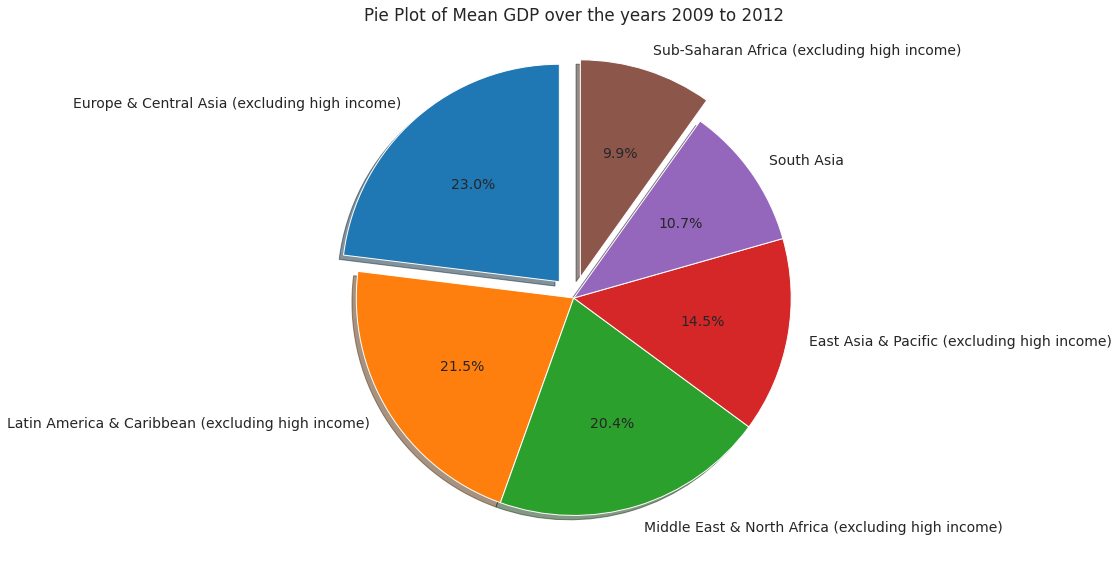

In [72]:
slices = np.array(mean_GDP_regions['GDP per capita, PPP (current international $)'] )
activ =  np.array(mean_GDP_regions['adminregion'])
plt.pie(slices, labels=activ, startangle=90, shadow= True, explode=(0.1,0,0,0,0,0.1), autopct= '%1.1f%%')
plt.title('Pie Plot of Mean GDP over the years 2009 to 2012')
plt.show()

Let us save and upload our work to Jovian before continuing.

In [73]:
import jovian

In [74]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries


'https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries'

## Inferences and Conclusion

In this begginer data analysis we analyzed a suicide and homicide rate dataset. We used popular python libraries for data analysis, like numpy, pandas and matplotlib to perform basic operations to extract some useful information and establish relationships among attributes of the dataset.

In [75]:
import jovian

In [76]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries


'https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries'

## References and Future Work

Resources used in this project are listed below:

> For dataset : www.kaggle.com

> Python libraries : matplotlib , pandas, numpy, seaborn, jovian

>Google Colab (ipython notebook)

In future we plan to analyze a broader dataset including more parameters like happiness index, education level, corruption level etc to figure out their relationships with suicide and homicide rates. This study has the potential to act as a catalyst towards understanding the human induced mortality in countries.


> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>


 

In [ ]:
import jovian

In [244]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries


'https://jovian.ai/2019phs1005/analysis-of-homicide-and-sucide-rates-of-countries'